In [1]:
#  Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#  Load dataset
df = pd.read_csv("../Data/breast-cancer.csv")

#  View columns
print(df.columns)

#  Drop non-informative columns (like 'id' or unnamed)
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)

#  Encode target labels (e.g., 'diagnosis': M = 1, B = 0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M = 1, B = 0

#  Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(" Data preprocessing complete!")


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
 Data preprocessing complete!


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

#  Evaluate Linear SVM
print("🔹 Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("🔹 Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("🔹 Classification Report (Linear):\n", classification_report(y_test, y_pred_linear))

#  RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

#  Evaluate RBF SVM
print("🔹 RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("🔹 Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("🔹 Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))


🔹 Linear SVM Accuracy: 0.956140350877193
🔹 Confusion Matrix (Linear):
 [[68  3]
 [ 2 41]]
🔹 Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

🔹 RBF SVM Accuracy: 0.9736842105263158
🔹 Confusion Matrix (RBF):
 [[70  1]
 [ 2 41]]
🔹 Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



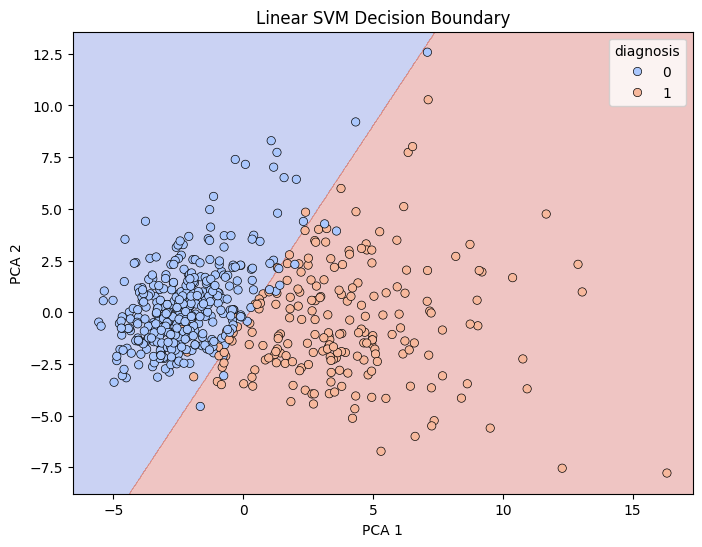

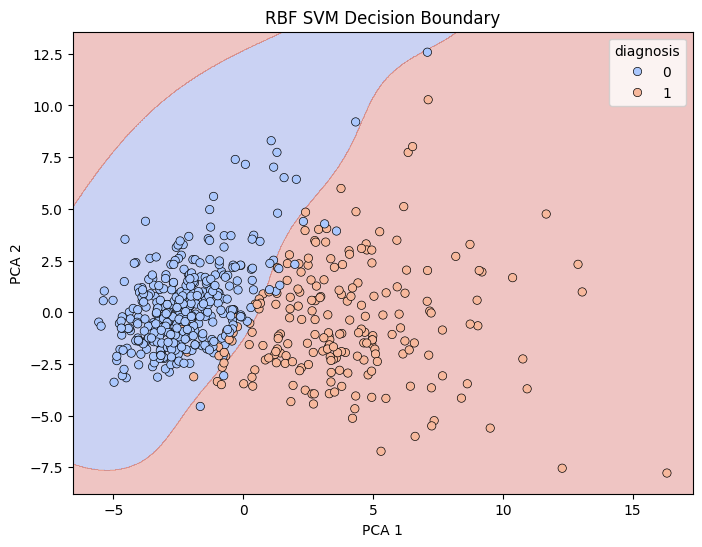

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#  Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-reduced data for plotting
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

#  Re-train models on 2D data
svm_linear_pca = SVC(kernel='linear', C=1.0).fit(X_train_pca, y_train)
svm_rbf_pca = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_train_pca, y_train)

#  Helper function to plot decision boundary
def plot_decision_boundary(model, X, y, title, filename):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.savefig(f"../output/{filename}", bbox_inches='tight')
    plt.show()

#  Plot for linear
plot_decision_boundary(svm_linear_pca, X_pca, y, "Linear SVM Decision Boundary", "decision_boundary_linear.png")

#  Plot for RBF
plot_decision_boundary(svm_rbf_pca, X_pca, y, "RBF SVM Decision Boundary", "decision_boundary_rbf.png")


In [4]:
from sklearn.model_selection import GridSearchCV

# 🔧 Define parameter grid for RBF SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# 🔍 Grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

# 📊 Best parameters and accuracy
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Best Cross-Validated Accuracy: 0.9736263736263737


In [5]:
#  Evaluate on test set
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("🧪 Test Set Accuracy:", accuracy_score(y_test, y_pred_grid))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred_grid))


🧪 Test Set Accuracy: 0.9824561403508771
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

